### Loading the data


In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/praksa_manu/distilroberta_model_training/predicted.csv'

data = pd.read_csv(path)

data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Predictions
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992,neutral
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992,neutral
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992,neutral
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992,neutral
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992,neutral
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral


In [3]:
data.rename(columns={"Predictions": "Category"}, inplace=True)

### Exapnding feature domain
We will implement lags for the Close column for previous 5 days.

In [4]:
for i in range(1,6):
  data[f'Close_lag_{i}'] = data['Close'].shift(i)

data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992,neutral,NaN,NaN,NaN,NaN,NaN
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,NaN,NaN,NaN,NaN
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,NaN,NaN,NaN
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,NaN,NaN
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,NaN
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992


In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

,0
Date,0
Tweet,0
Stock Name,0
Company Name,0
Close,0
Category,0
Close_lag_1,0
Close_lag_2,0
Close_lag_3,0
Close_lag_4,0


### Applying date transformation

We will split the values of the 'Date' column into month and year to have better approach. Then we will apply sine and cosine transformation to this values.

In [7]:
import numpy as np

In [8]:
def split_date(row):
    month, day, year = row['Date'].split('/')

    return pd.Series({'Month': int(month), 'Year': int(year)})

In [9]:
data[['Month', 'Year']] = data.apply(split_date, axis=1)

In [10]:
data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month,Year
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
10,9/29/2022,"Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\r...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
11,9/29/2022,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
12,9/29/2022,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
13,9/29/2022,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022
14,9/29/2022,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022


In [11]:
def sine_transform(value, max_value):

    return np.sin(2 * np.pi * value / max_value)

In [12]:
def cosine_transform(value, max_value):

    return np.cos(2 * np.pi * value / max_value)

In [13]:
data['Month_Sin'] = data['Month'].apply(lambda x: sine_transform(x, 12))

In [14]:
data['Month_Cos'] = data['Month'].apply(lambda x: cosine_transform(x, 12))

In [15]:
max_year = data['Year'].max()

data['Year_Sin'] = data['Year'].apply(lambda x: sine_transform(x, max_year))

In [16]:
data['Year_Cos'] = data['Year'].apply(lambda x: cosine_transform(x, max_year))

In [17]:
data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month,Year,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,9/29/2022,"Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\r...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,9/29/2022,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,9/29/2022,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,9/29/2022,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,9/29/2022,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,9,2022,-1.0,-1.836970e-16,-2.449294e-16,1.0


To avoid redundancy we will drop columns 'Date', 'Month' and 'Year'.

In [18]:
data.drop(columns=['Date', 'Year', 'Month'], inplace=True)

data.head(10)

,Tweet,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,"Tomorrow, Tesla, $TSLA, AI day 2 is ongoing.\r...",TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


### Converting metrics


Because in the previous tasks we added sentiment column while preprocessing the 'Tweet' column and applying the sentiment to the datset in this task we do not need it.

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [20]:
data.drop(columns=['Tweet'], inplace=True)

In [21]:
len(data['Stock Name'].unique())

25

In [22]:
sn_encoder = LabelEncoder()

In [23]:
data['Stock Name'] = sn_encoder.fit_transform(data['Stock Name'])

In [24]:
sn_scaler = MinMaxScaler()

data['Stock Name'] = sn_scaler.fit_transform(data[['Stock Name']])

In [25]:
data.head(10)

,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,0.833333,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,0.833333,"Tesla, Inc.",268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,0.833333,"Tesla, Inc.",268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


In [26]:
len(data['Company Name'].unique())

25

In [27]:
cn_encoder = LabelEncoder()

In [28]:
data['Company Name'] = cn_encoder.fit_transform(data['Company Name'])

In [29]:
cn_scaler = MinMaxScaler()

data['Company Name'] = cn_scaler.fit_transform(data[['Company Name']])

In [30]:
data.head(10)

,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,0.833333,0.75,268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,0.833333,0.75,268.209992,neutral,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,0.833333,0.75,268.209992,positive,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


In [31]:
close_scaler = MinMaxScaler()

data['Close'] = close_scaler.fit_transform(data[['Close']])

In [32]:
def encode_sentiment(row):
    if row['Category'] == 'positive':
        return 1
    elif row['Category'] == 'negative':
        return -1
    else:
        return 0


data['Category'] = data.apply(encode_sentiment, axis=1)

In [33]:
data.head(10)

,Stock Name,Company Name,Close,Category,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Month_Sin,Month_Cos,Year_Sin,Year_Cos
5,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
6,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
7,0.833333,0.75,0.377748,1,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
8,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
9,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
10,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
11,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
12,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
13,0.833333,0.75,0.377748,0,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0
14,0.833333,0.75,0.377748,1,268.209992,268.209992,268.209992,268.209992,268.209992,-1.0,-1.836970e-16,-2.449294e-16,1.0


### Dividing dataset into subsets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X, y = data.drop(columns=['Close']), data['Close']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

### Finding best model

In [58]:
!pip install --upgrade xgboost

In [59]:
!pip install --upgrade scikit-learn

In [65]:
!pip install scikit-learn==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [40]:
import xgboost as xgb
import sklearn

In [38]:
print(xgboost.__version__)

2.1.3


In [39]:
print(sklearn.__version__)

1.3.1


In [41]:
model  = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [43]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [44]:
preds = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
print(f"Mean squared error of the Close prediction is: {mean_squared_error(y_test, preds)}")
print(f"Mean absolute error of the Close prediction is: {mean_absolute_error(y_test, preds)}")
print(f"R2 score of the Close prediction is: {r2_score(y_test, preds)}")

Mean squared error of the Close prediction is: 0.0016115182617299926
Mean absolute error of the Close prediction is: 0.028119969660930437
R2 score of the Close prediction is: 0.8935675002457825


### Plotting the results

In [48]:
import matplotlib.pyplot as plt
import numpy as np

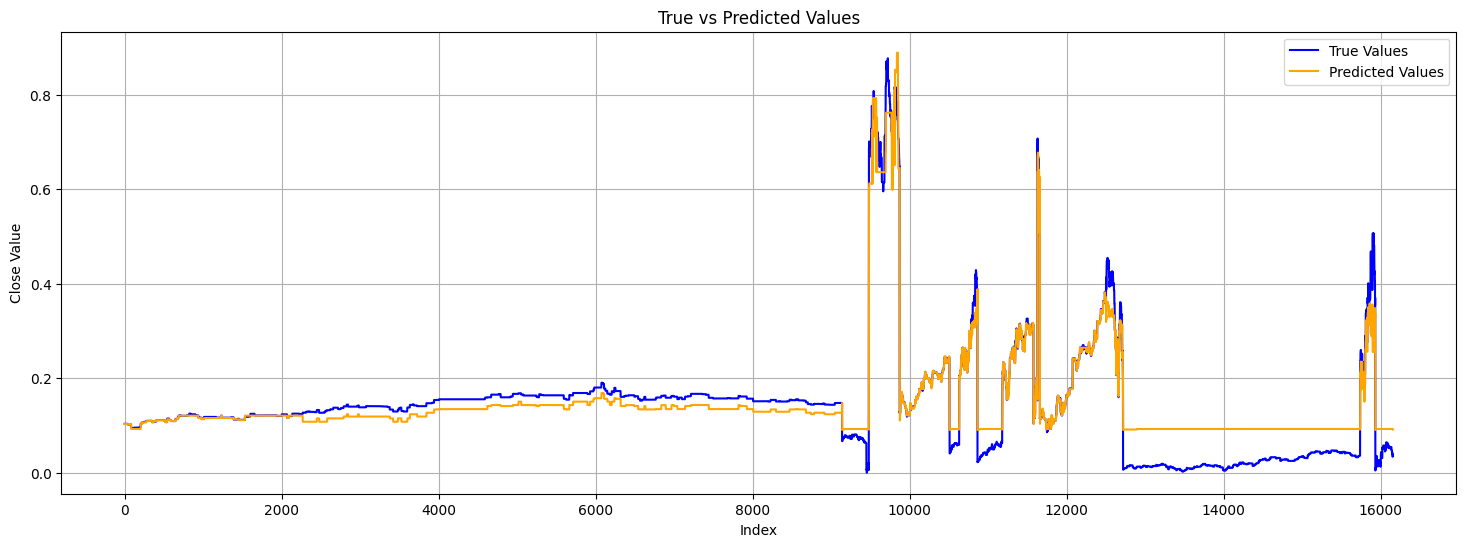

In [54]:
indices = np.arange(len(y_test))

plt.figure(figsize=(18, 6))

plt.plot(indices, y_test, label='True Values', color='blue')

plt.plot(indices, preds, label='Predicted Values', color='orange')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()